## Viability of AAV 1st order mutants

This notebook contains the data processing and engineering steps of the 'aav_packaging_all.csv' dataset from the paper:
‘Comprehensive AAV capsid fitness landscape reveals a viral gene and enables machine-guided design’ Science. 2019 Nov 29;366(6469):1139-1143. doi: 10.1126/science.aaw2900.

The dataset was retrieved at the end of July 2023 from the authors github:
https://github.com/churchlab/AAV_fitness_landscape/blob/25d10c32650efaab50bec8bda7bab656952869cd/data/dataframes/aav_packaging_all.csv.gz   

The dataset contains the counting of 1st order mutation AAV mutants in the original plasmid library and the rescued virus pool, thus, enabling the calculation of a viability score for each mutant.

The dataset also contains detailed information of the type, nature, and position of the mutation, thus enabling the reconstitution of the protein sequence of each mutant.

This notebook contains the steps to calculate the viability score and to reconstitute the protein sequence of each mutant.

To calculate vaiability, the following metrics are relevant:
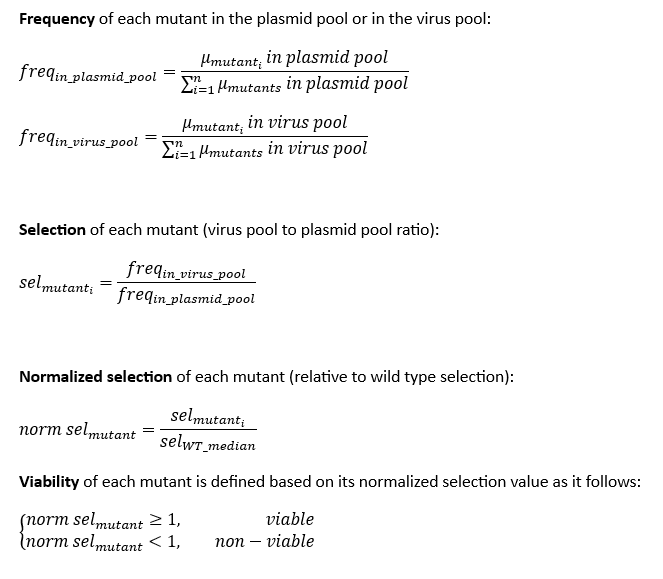

### Load libraries & data

In [1]:
import pandas as pd
import numpy as np

import os

os.chdir("..")

# Reads csv; indicates no header, ignores the first 6 lines
df = pd.read_csv('./datasets/aav_packaging_all.csv', header=None, skiprows=6)

# Sets the column names of the df to the values present in the first row of the df
df.columns = df.iloc[0]

# Updates the df by excluding the first row (column names) so that it doesn't interfere with the subsequent calculations.
df = df[1:]  

/tmp/ipykernel_2194774/1674864165.py:9: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./datasets/aav_packaging_all.csv', header=None, skiprows=6)


In [2]:
#DF inspection - datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207168 entries, 1 to 207168
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   abs_pos      207168 non-null  object 
 1   tile_num     206454 non-null  object 
 2   aa           207168 non-null  object 
 3   is_wt_aa     207168 non-null  object 
 4   is_wt_codon  207168 non-null  object 
 5   wt_bc        207168 non-null  object 
 6   lib_type     207168 non-null  object 
 7   enzyme       206454 non-null  object 
 8   codon        207168 non-null  object 
 9   aa-codon     207168 non-null  object 
 10  barcode      206454 non-null  object 
 11  nan          202100 non-null  float64
 12  nan          202200 non-null  float64
 13  nan          202124 non-null  float64
 14  nan          199198 non-null  float64
 15  nan          198736 non-null  float64
 16  nan          197003 non-null  float64
 17  nan          160162 non-null  float64
 18  nan          167352 non-

### Calculate average counts on a 'per pool'  and a 'per promoter' basis

In [3]:
# Calculates the average of values across chosen columns for each row in the df. 
#The result is assigned to a new column named "count_average_pool_promoter"
df["count_average_plasmid_CMV"] = df.iloc[:, 11:14].mean(axis=1)
df["count_average_virus_CMV"] = df.iloc[:, 14:20].mean(axis=1)
df["count_average_plasmid_Rep"] = df.iloc[:, 20:25].mean(axis=1)	
df["count_average_virus_Rep"] = df.iloc[:, 25:31].mean(axis=1)

# Exclude columns 10-30 (containing the original counts) for the sake of simplicity
#df = df.drop(df.columns[11:30],axis = 1)

#Export to inspect
df.to_csv('./outputs/aav_packaging_averages.csv', index=False)

In [4]:
#DF inspection - datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207168 entries, 1 to 207168
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   abs_pos                    207168 non-null  object 
 1   tile_num                   206454 non-null  object 
 2   aa                         207168 non-null  object 
 3   is_wt_aa                   207168 non-null  object 
 4   is_wt_codon                207168 non-null  object 
 5   wt_bc                      207168 non-null  object 
 6   lib_type                   207168 non-null  object 
 7   enzyme                     206454 non-null  object 
 8   codon                      207168 non-null  object 
 9   aa-codon                   207168 non-null  object 
 10  barcode                    206454 non-null  object 
 11  nan                        202100 non-null  float64
 12  nan                        202200 non-null  float64
 13  nan                        20

### Calculate frequencies in each pool (plasmid or virus) and on a promoter basis

In [5]:
# Identify the column names that shall be used for frequency calculations
average_columns = ['count_average_plasmid_CMV', 'count_average_virus_CMV', 'count_average_plasmid_Rep', 'count_average_virus_Rep']

# Calculate the frequencies
freq_columns = df[average_columns].div(df[average_columns].sum())

# Add the new frequency columns to the DataFrame and modify header of last four columns
df = pd.concat([df, freq_columns], axis=1)
new_column_names = ['freq_plasmid_CMV', 'freq_virus_CMV', 'freq_plasmid_Rep', 'freq_virus_Rep']
df.columns = list(df.columns[:-len(new_column_names)]) + new_column_names

#Export to inspect
df.to_csv('./outputs/aav_packaging_frequencies.csv', index=False)

In [6]:
freq_columns

,count_average_plasmid_CMV,count_average_virus_CMV,count_average_plasmid_Rep,count_average_virus_Rep
1,0.000013,0.000007,0.000011,0.000007
2,0.000014,0.000006,0.000012,0.000013
3,0.000002,0.000005,0.000002,0.000001
4,0.000003,0.000002,0.000002,0.000002
5,0.000023,0.000010,0.000021,0.000015
...,...,...,...,...
207164,0.000096,0.000024,0.000086,0.000006
207165,0.000045,0.000003,0.000049,0.000003
207166,0.000021,0.000001,0.000025,0.000002
207167,0.000044,0.000002,0.000038,0.000005


### Calculating the selection on a promoter basis

In [7]:
# Calculate sel_CMV and sel_Rep with NaN handling during division
# NaN in the numerator should return '0': mutants not appearing in the virus pool, in principle, are not viable
# This does not make sense for plasmid: not appearing in plasmid pool says nothing about viability, thus
# NaN in the denominator should return NaN
 
df['sel_CMV'] = np.where(df['freq_virus_CMV'].isna(), 0,
                         np.where(df['freq_plasmid_CMV'].isna(), np.nan,
                                  df['freq_virus_CMV'] / df['freq_plasmid_CMV']))

df['sel_Rep'] = np.where(df['freq_virus_Rep'].isna(), 0,
                         np.where(df['freq_plasmid_Rep'].isna(), np.nan,
                                  df['freq_virus_Rep'] / df['freq_plasmid_Rep']))

#Export to inspect
df.to_csv('./outputs/aav_packaging_selections.csv', index=False)

#DF inspection - datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207168 entries, 1 to 207168
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   abs_pos                    207168 non-null  object 
 1   tile_num                   206454 non-null  object 
 2   aa                         207168 non-null  object 
 3   is_wt_aa                   207168 non-null  object 
 4   is_wt_codon                207168 non-null  object 
 5   wt_bc                      207168 non-null  object 
 6   lib_type                   207168 non-null  object 
 7   enzyme                     206454 non-null  object 
 8   codon                      207168 non-null  object 
 9   aa-codon                   207168 non-null  object 
 10  barcode                    206454 non-null  object 
 11  nan                        202100 non-null  float64
 12  nan                        202200 non-null  float64
 13  nan                        20

## Generation of labels

In [8]:
# Convert datatype of 'abs_pos', 'is_wt_aa' and 'is_wt_codon' columns for proper label generation 
df['abs_pos'] = df['abs_pos'].astype(float)
df['is_wt_aa'] = df['is_wt_aa'].astype(float)
df['is_wt_codon'] = df['is_wt_codon'].astype(float)

# Function to generate labels based on the content of the columns:
#'barcode', 'abs_pos', 'lib_type', 'aa', 'codon', 'is_wt_cod', and 'is_wt_aa' 

def generate_label(row):
    if pd.isna(row['barcode']):
        return 'guide'  # Original sequences, I still don't know what they are doing there...

    num = int(row['abs_pos'])
    has_half = abs(row['abs_pos'] - num) > 0
    label_part1 = f'{num:03d}_{"5" if has_half else "0"}'

    lib_type = row['lib_type']
    if lib_type == 'sub':
        label_part2 = '_sub'
    elif lib_type == 'del':
        label_part2 = '_del'
    elif lib_type == 'ins':
        label_part2 = '_ins'
    else:
        label_part2 = ''  # Default if lib_type doesn't match any of the above

    aa = row['aa']
    label_part3 = f'_{aa}'

    codon = row['codon']
    label_part4 = f'_{codon}'

    is_wt_codon = row['is_wt_codon']
    is_wt_aa = row['is_wt_aa']
    if is_wt_aa == 1 and is_wt_codon == 1:
        label_part5 = '_WT2'
    elif is_wt_aa == 1 and is_wt_codon == 0:
        label_part5 = '_WT1'
    else:
        label_part5 = '_MTT'

    return label_part1 + label_part2 + label_part3 + label_part4 + label_part5

# Create the 'label' column and generate the labels
df['label'] = df.apply(generate_label, axis=1)

# Export to inspect
df.to_csv('./outputs/aav_packaging_selections_labels.csv', index=False)

### Count check and confirmation against the original csv

In [9]:
#Count rows of guides, mutants & WTs
counts = {}
label_keywords = ['guide','MTT', 'WT1', 'WT2']

for keyword in label_keywords:
    counts[keyword] = df['label'].str.contains(keyword).sum()
    print(f"Number of rows with '{keyword}' in the label: {counts[keyword]}")

Number of rows with 'guide' in the label: 714
Number of rows with 'MTT' in the label: 206050
Number of rows with 'WT1' in the label: 0
Number of rows with 'WT2' in the label: 404


Reality:

Number of guides: 714

Number of MTT: 206050

Number of WT1: 0 (indeed it is zero, although this is not aligned with what is described in the paper methods)

Number of WT2: 404 


### Calculate normalized selection (and viability)

In [10]:
#Calculate WT median
only_wt2 = df[df['label'].str.contains('WT2')]
swt_CMV = only_wt2["sel_CMV"].median()
swt_Rep = only_wt2["sel_Rep"].median()

print(f"Median of 'sel_CMV' for rows with 'WT2': {swt_CMV}")
print(f"Median of 'sel_Rep' for rows with 'WT2': {swt_Rep}")

Median of 'sel_CMV' for rows with 'WT2': 2.8079558419063906
Median of 'sel_Rep' for rows with 'WT2': 3.1563897399142213


In [11]:
#Calculate normalized selection

def calculate_normalized_selection(row, *args):
    return row[args[0]]/args[1]


only_wt2 = df[df['label'].str.contains('WT2')]
print(len(only_wt2))

df["sNorm_CMV"] = df.apply(calculate_normalized_selection, axis=1, args=["sel_CMV", swt_CMV])
df["sNorm_Rep"] = df.apply(calculate_normalized_selection, axis=1, args=["sel_Rep", swt_Rep])

print(df[:5])

404
   abs_pos tile_num aa  is_wt_aa  is_wt_codon wt_bc lib_type enzyme codon  \
1      1.0      0.0  *       0.0          0.0     0      sub   bbsi   TAA   
2      1.0      0.0  *       0.0          0.0     0      sub   bbsi   TAA   
3      1.0      0.0  *       0.0          0.0     0      sub   bbsi   TAG   
4      1.0      0.0  *       0.0          0.0     0      sub   bbsi   TAG   
5      1.0      0.0  *       0.0          0.0     0      sub   bbsi   TGA   

  aa-codon  ... count_average_virus_Rep  freq_plasmid_CMV  freq_virus_CMV  \
1    *-TAA  ...                  272.40          0.000013        0.000007   
2    *-TAA  ...                  471.75          0.000014        0.000006   
3    *-TAG  ...                   41.00          0.000002        0.000005   
4    *-TAG  ...                   87.50          0.000003        0.000002   
5    *-TGA  ...                  537.25          0.000023        0.000010   

   freq_plasmid_Rep  freq_virus_Rep   sel_CMV   sel_Rep               

In [12]:
# Functions to define (binary) vability
def calculate_viability_CMV(row):
    return int(row["sNorm_CMV"] >= 1)

def calculate_viability_Rep(row):
    return int(row["sNorm_Rep"] >= 1)

df["viability_CMV"] = df.apply(calculate_viability_CMV, axis=1)
df["viability_Rep"] = df.apply(calculate_viability_Rep, axis=1)

# Export to inspect
df.to_csv('./outputs/aav_packaging_normSelection.csv', index=False)

### Get the original sequence

In [13]:
#  Uses the query function to filter df, selecting rows where both conditions are satisfied
double_wt_df = df.query("(is_wt_aa == '1' or is_wt_aa == 1) and (is_wt_codon == '1' or is_wt_codon == 1)")

#  Initializes an empty list 'seen_po's which will be used to keep track of the positions that have already been seen
seen_pos = []

#  Initializes an empty string 'seq' which will be used to build the amino acid sequence
seq = ""

# Loop that iterates through each row of double_wt_df; at each iteration, it extracts the index and the row itself.
for index, row in double_wt_df.iterrows():
    
    # Retrieves the value in the "abs_pos" column of the current row
    pos = row["abs_pos"]    
    
    # Checks if the value of 'pos' is not an integer; if this condition is true, it prints the value of pos | WHY not int?
    if not float(pos).is_integer():
        print(pos)   
   
    # Checks if the 'pos' value has not been encountered before (not in seen_pos list).
    if not pos in seen_pos:
        seq += row["aa"]   
        seen_pos.append(pos) # Appends the value in the "aa" column of the current row to the seq string

print(seq)

MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLVLPGYKYLGPFNGLDKGEPVNEADAAALEHDKAYDRQLDSGDNPYLKYNHADAEFQERLKEDTSFGGNLGRAVFQAKKRVLEPLGLVEEPVKTAPGKKRPVEHSPVEPDSSSGTGKAGQQPARKRLNFGQTGDADSVPDPQPLGQPPAAPSGLGTNTMATGSGAPMADNNEGADGVGNSSGNWHCDSTWMGDRVITTSTRTWALPTYNNHLYKQISSQSGASNDNHYFGYSTPWGYFDFNRFHCHFSPRDWQRLINNNWGFRPKRLNFKLFNIQVKEVTQNDGTTTIANNLTSTVQVFTDSEYQLPYVLGSAHQGCLPPFPADVFMVPQYGYLTLNNGSQAVGRSSFYCLEYFPSQMLRTGNNFTFSYTFEDVPFHSSYAHSQSLDRLMNPLIDQYLYYLSRTNTPSGTTTQSRLQFSQAGASDIRDQSRNWLPGPCYRQQRVSKTSADNNNSEYSWTGATKYHLNGRDSLVNPGPAMASHKDDEEKFFPQSGVLIFGKQGSEKTNVDIEKVMITDEEEIRTTNPVATEQYGSVSTNLQRGNRQAATADVNTQGVLPGMVWQDRDVYLQGPIWAKIPHTDGHFHPSPLMGGFGLKHPPPQILIKNTPVPANPSTTFSAAKFASFITQYSTGQVSVEIEWELQKENSKRWNPEIQYTSNYNKSVNVDFTVDTNGVYSEPRPIGTRYLTRNL


### Reconstruct individual sequences

In [14]:
# Auxiliary functions to insert, delete and susbstitute amino acids in the original sequence

def insertion(aa, pos):
    return seq[:pos] + aa + seq[pos:]

def deletion(pos):
    return seq[:pos]+seq[pos+1:]

def substitution(aa, pos):
    return seq[:pos] + aa + seq[pos+1:]

In [15]:
# Check that the functions are working:

print("INSERTION")
print("")
print(insertion("X", 0))
print("")
print(insertion("X", 3))
print("")    
print(insertion("X", 5))
print()

print("DELETION")
print("")
print(deletion(0))
print("")
print(deletion(3))
print("")    
print(deletion(5))
print()

print("SUBSTITUTION")
print("")
print(substitution("X", 0))
print("")
print(substitution("X", 3))
print("")    
print(substitution("X", 5))
print()

INSERTION

XMAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLVLPGYKYLGPFNGLDKGEPVNEADAAALEHDKAYDRQLDSGDNPYLKYNHADAEFQERLKEDTSFGGNLGRAVFQAKKRVLEPLGLVEEPVKTAPGKKRPVEHSPVEPDSSSGTGKAGQQPARKRLNFGQTGDADSVPDPQPLGQPPAAPSGLGTNTMATGSGAPMADNNEGADGVGNSSGNWHCDSTWMGDRVITTSTRTWALPTYNNHLYKQISSQSGASNDNHYFGYSTPWGYFDFNRFHCHFSPRDWQRLINNNWGFRPKRLNFKLFNIQVKEVTQNDGTTTIANNLTSTVQVFTDSEYQLPYVLGSAHQGCLPPFPADVFMVPQYGYLTLNNGSQAVGRSSFYCLEYFPSQMLRTGNNFTFSYTFEDVPFHSSYAHSQSLDRLMNPLIDQYLYYLSRTNTPSGTTTQSRLQFSQAGASDIRDQSRNWLPGPCYRQQRVSKTSADNNNSEYSWTGATKYHLNGRDSLVNPGPAMASHKDDEEKFFPQSGVLIFGKQGSEKTNVDIEKVMITDEEEIRTTNPVATEQYGSVSTNLQRGNRQAATADVNTQGVLPGMVWQDRDVYLQGPIWAKIPHTDGHFHPSPLMGGFGLKHPPPQILIKNTPVPANPSTTFSAAKFASFITQYSTGQVSVEIEWELQKENSKRWNPEIQYTSNYNKSVNVDFTVDTNGVYSEPRPIGTRYLTRNL

MAAXDGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLVLPGYKYLGPFNGLDKGEPVNEADAAALEHDKAYDRQLDSGDNPYLKYNHADAEFQERLKEDTSFGGNLGRAVFQAKKRVLEPLGLVEEPVKTAPGKKRPVEHSPVEPDSSSGTGKAGQQPARKRLNFGQTGDADSVPDPQPLGQPPAAPSGLGTNTMATGSGAPMADNNEGADGVGNSSGNWHCDSTWMGDRVITTSTRTWALP

In [16]:
# Function to reconstruct sequences (uses auxiliary)
def reconstruct(row):
    # Retrieves the value in the "label" column of the current row
    label = row["label"]
    
    # If the value in the lable is 'guide', it corresponds to the original sequence
    if label == 'guide':
        return seq
    
    # Here we split the "label" string into multiple parts using the underscore character as the delimiter;
    # The individual parts are assigned to the variables pos, frac, operation, aa, codon, and wt:  
    pos, frac, operation, aa, codon, wt = label.split("_")
    
    # Converts the pos (position) string to an integer. WHY DO WE NEED THIS?
    pos = int(pos)
    
    # Employ auxiliary functions for reconstruction
    if operation == "ins":
        mutant_sequence = insertion(aa, pos)
    elif operation == "sub":
        mutant_sequence = substitution(aa, pos)
    elif operation == "del":
        mutant_sequence = deletion(pos)
        
    return mutant_sequence

In [17]:

# Reconstruct sequences
df["sequence"] = df.apply(reconstruct, axis=1)



# Make a new dataset only with label, sequence and viability, for the sake of simplicity
df = df[["label", "sequence", "viability_CMV","viability_Rep"]]


# Export to inspect
df.to_csv("./outputs/reconstructed_sequences_viability_f.csv", index=False)

# Display
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207168 entries, 1 to 207168
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   label          207168 non-null  object
 1   sequence       207168 non-null  object
 2   viability_CMV  207168 non-null  int64 
 3   viability_Rep  207168 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ MB


In [18]:
#Calculate viability %
# Define the columns to analyze
columns_to_analyze = ['CMV', 'Rep']

for column in columns_to_analyze:
    total_count = len(df)
    viables_count = (df['viability_' + column] == 1).sum()
    percentage_viables = (viables_count / total_count) * 100
    percentage_non_viables = 100 - percentage_viables  # Calculate non-viables percentage
    print(f'Viables {column}: {percentage_viables:.2f}%')
    print(f'Non-viables {column}: {percentage_non_viables:.2f}%')

Viables CMV: 9.04%
Non-viables CMV: 90.96%
Viables Rep: 7.68%
Non-viables Rep: 92.32%


In [19]:
#Calculate agreement between CMV and Rep libraries

# Define a custom function to handle NaN and perform bitwise AND
def custom_intersection(row):
    if np.isnan(row['viability_CMV']) and np.isnan(row['viability_Rep']):
        return 1
    elif np.isnan(row['viability_CMV']) or np.isnan(row['viability_Rep']):
        return 0
    elif row['viability_CMV'] == row['viability_Rep']:
        return 1
    else:
        return 0

# Create the 'intersection' column using apply
df['intersection'] = df.apply(custom_intersection, axis=1)

# Calculate the percentage of agreement (including NaN values)
total_rows = len(df)
percentage_agreement = (df['intersection'].sum() / total_rows) * 100

# Export to inspect
df.to_csv("./outputs/reconstructed_sequences_viability_agreement.csv", index=False)

# Print the percentage of agreement
print(f"Agreement between 'viability_CMV' and 'viability_Rep': {percentage_agreement:.2f}%")

Agreement between 'viability_CMV' and 'viability_Rep': 91.84%
